In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [118]:
df = pd.read_csv("long_df.csv")

In [119]:
df = df.fillna(0)
df.columns
df["sez"] = np.where(df["ent"] > 0,1,0)


In [120]:
df["egdp"].isin([0]).any()

False

In [121]:
df["pop"].isin([0]).any()

False

In [122]:
print(df[['egdp', 'pop']].min())

egdp     0.270584
pop     26.553768
dtype: float64


In [123]:
offset = 1000000 
df["egdppc"] = (df["egdp"]/df["pop"]) + offset
mask = df['egdppc'] == 0 
df = df[~mask]
df["lnegdppc"] = np.log(df["egdppc"])

In [124]:
mask2 = df["ntl_"] == 0
df = df[~mask2] 
df["ntlpc"] = (df["ntl_"]/df["pop"]) + offset
df["lnntl"] = np.log(df["ntlpc"])

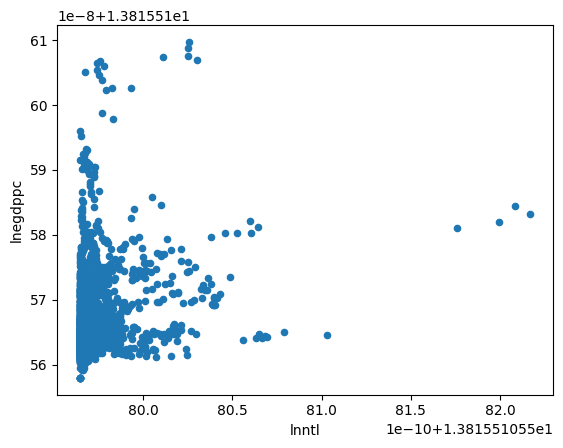

In [127]:
df.plot(x="lnntl", y="lnegdppc", kind="scatter");

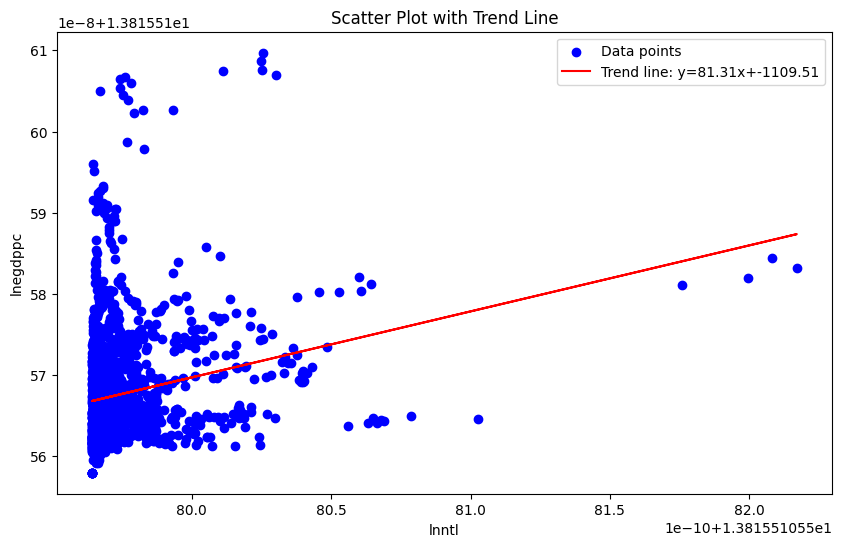

In [131]:
slope, intercept = np.polyfit(df['lnntl'], df['lnegdppc'], 1)
trend_line = slope * df['lnntl'] + intercept

# Step 2: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['lnntl'], df['lnegdppc'], color='blue', label='Data points')

# Step 3: Add the regression line
plt.plot(df['lnntl'], trend_line, color='red', label=f'Trend line: y={slope:.2f}x+{intercept:.2f}')

# Enhance plot
plt.title('Scatter Plot with Trend Line')
plt.xlabel('lnntl')
plt.ylabel('lnegdppc')
plt.legend()

plt.show()

In [132]:
df['lnntl'].corr(df['lnegdppc'])

0.22208121447832124

In [ ]:
df['new_var'] = np.where(df['ent'] > 1, 1, 0)

boxplot = df.boxplot(by='sez', column=['egdp'], grid=False)

<Axes: title={'center': 'lnegdppc'}, xlabel='sez'>

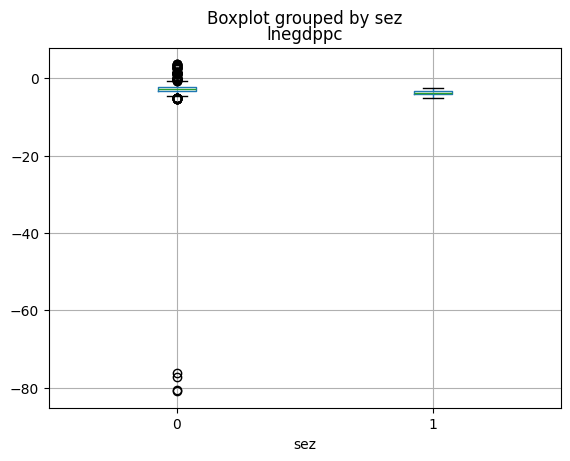

In [37]:
df.boxplot(by="sez", column="lnegdppc")